In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#### Загрузить данные в pandas по url=https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv

In [2]:
dataset = pd.read_csv("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv", sep="\t")

dataset.head(7)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69


#### 1. Вывести: кол-во наблюдений в датасете

In [3]:
print(dataset.shape[0])

4622


#### 2. Вывести названия столбцов

In [4]:
for columns in dataset.columns:
    print(columns)

order_id
quantity
item_name
choice_description
item_price


#### 3. Определить самую частую позицию (item) в заказе 

In [5]:
dataset['item_name'].mode()[0]

'Chicken Bowl'

#### 4. Построить гистрограмму частоты заказов по позициям (item )

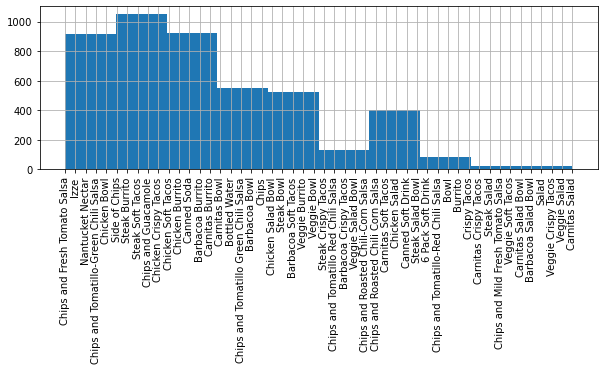

In [6]:
hist=dataset['item_name'].hist(xrot=90, figsize=(10,3))
figure=hist.get_figure()

#### 5. Измените тип переменной item_price c с помощью лямбды функции

In [7]:
print(type(dataset['item_price'][0]))
dataset['item_price'] = dataset['item_price'].apply(lambda x: float(x[1:]))
print(type(dataset['item_price'][0]))
dataset.head()

<class 'str'>
<class 'numpy.float64'>


,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


#### 6. Построить гистограмму кол-во денег заработанных по каждой позиции (item)

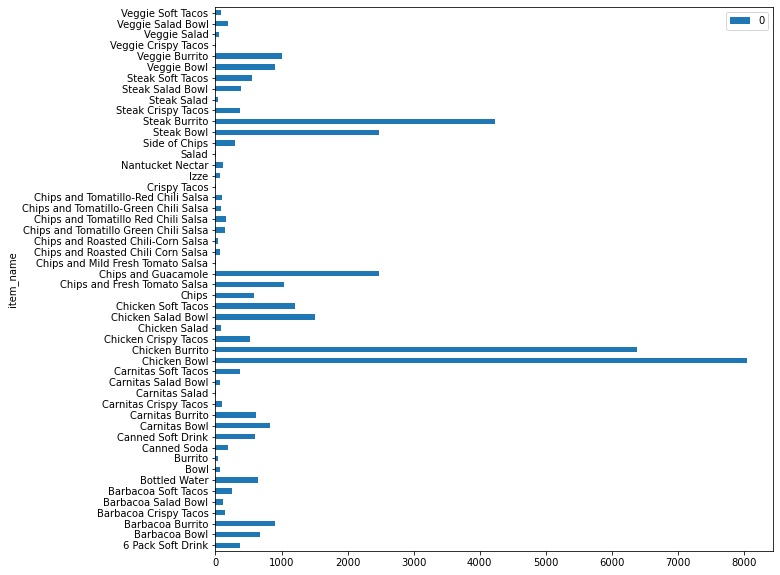

In [8]:
pd.concat([dataset['item_name'], dataset['quantity'] * dataset['item_price']], axis=1).groupby('item_name').sum().plot(kind='barh', figsize=(10,10))
plt.show()

#### 7. Средняя сумма заказа? (минимум 2 способа)

In [9]:
print(dataset['item_price'].sum() / dataset['order_id'].nunique())
print(dataset.groupby('order_id')['item_price'].sum().mean())

18.811428571428575
18.81142857142869


#### 8. Выведите среднее, минимальное и максимальное, медианное значения позиций в заказе

In [10]:
print(dataset['quantity'].mean())
print(dataset['quantity'].min())
print(dataset['quantity'].max())
print(dataset['quantity'].median())

1.0757247944612722
1
15
1.0


#### 9. Определить статистику заказов стейков, а также статистику заказов прожарки.

In [11]:
steak = dataset[dataset['item_name'].str.contains("Steak")]
steak["quantity"].describe()



count    702.000000
mean       1.045584
std        0.228314
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        3.000000
Name: quantity, dtype: float64

In [12]:
mild = dataset[dataset['choice_description'].str.contains('Mild',na=False)]
medium = dataset[dataset['choice_description'].str.contains('Medium',na=False)]
hot = dataset[dataset['choice_description'].str.contains('Hot',na=False)]
print("mild")
mild["quantity"].describe()


mild


count    382.000000
mean       1.060209
std        0.248962
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        3.000000
Name: quantity, dtype: float64

In [13]:
print("medium")
medium["quantity"].describe()

medium


count    360.000000
mean       1.052778
std        0.247535
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        3.000000
Name: quantity, dtype: float64

In [14]:
print("hot")
hot["quantity"].describe()

hot


count    262.000000
mean       1.049618
std        0.217571
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        2.000000
Name: quantity, dtype: float64

#### 10. Добавить новый столбец цен на каждую позицию в заказе в рублях.

In [15]:
dataset['item_price_rub']=round(dataset.item_price * 72.44, 2)
dataset.head()

,order_id,quantity,item_name,choice_description,item_price,item_price_rub
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39,173.13
1,1,1,Izze,[Clementine],3.39,245.57
2,1,1,Nantucket Nectar,[Apple],3.39,245.57
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39,173.13
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,1230.03


#### 11. Сгруппировать заказы по входящим позициям в него. Отдельно сгруппировать по стейкам во всех видах прожарках.


In [16]:
groupbypos = dataset.groupby('order_id').agg({'item_name': lambda dataset: ", ".join(dataset),'item_price':np.sum,'quantity':np.sum})
groupbypos

,item_name,item_price,quantity
order_id,,,
1,"Chips and Fresh Tomato Salsa, Izze, Nantucket ...",11.56,4
2,Chicken Bowl,16.98,2
3,"Chicken Bowl, Side of Chips",12.67,2
4,"Steak Burrito, Steak Soft Tacos",21.00,2
5,"Steak Burrito, Chips and Guacamole",13.70,2
...,...,...,...
1830,"Steak Burrito, Veggie Burrito",23.00,2
1831,"Carnitas Bowl, Chips, Bottled Water",12.90,3
1832,"Chicken Soft Tacos, Chips and Guacamole",13.20,2


In [17]:
groupbysteak = steak.groupby('order_id', sort=False).agg({'item_name': lambda df: ", ".join(df), 'item_price':np.sum,'quantity':np.sum})
groupbysteak

,item_name,item_price,quantity
order_id,,,
4,"Steak Burrito, Steak Soft Tacos",21.00,2
5,Steak Burrito,9.25,1
16,Steak Burrito,8.99,1
20,Steak Burrito,11.75,1
21,Steak Burrito,8.99,1
...,...,...,...
1810,Steak Crispy Tacos,11.75,1
1818,Steak Salad Bowl,9.39,1
1829,Steak Burrito,11.75,1


#### 12. Определить цену по каждой позиции в отдельности. 

In [18]:
dataset['price_of_one_item'] = dataset['item_price'] / dataset['quantity']
dataset['price_of_one_item_in_rub'] = dataset['item_price_rub'] / dataset['quantity']
dataset.head(20)

,order_id,quantity,item_name,choice_description,item_price,item_price_rub,price_of_one_item,price_of_one_item_in_rub
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39,173.13,2.39,173.130
1,1,1,Izze,[Clementine],3.39,245.57,3.39,245.570
2,1,1,Nantucket Nectar,[Apple],3.39,245.57,3.39,245.570
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39,173.13,2.39,173.130
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,1230.03,8.49,615.015
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98,795.39,10.98,795.390
6,3,1,Side of Chips,NaN,1.69,122.42,1.69,122.420
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.75,851.17,11.75,851.170
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",9.25,670.07,9.25,670.070
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",9.25,670.07,9.25,670.070


In [19]:
dataset.groupby('item_name').agg({'price_of_one_item': [pd.NamedAgg('prices', lambda x: set(x)), 'mean'],
                                 'price_of_one_item_in_rub': [pd.NamedAgg('prices', lambda x: set(x)), 'mean']})

price_of_one_item  \
                                                                                  prices   
item_name                                                                                  
6 Pack Soft Drink                                                                 {6.49}   
Barbacoa Bowl                                    {8.99, 9.25, 8.69, 11.75, 11.48, 11.49}   
Barbacoa Burrito                                 {8.99, 9.25, 8.69, 11.75, 11.08, 11.48}   
Barbacoa Crispy Tacos                                         {11.48, 9.25, 8.99, 11.75}   
Barbacoa Salad Bowl                                                        {9.39, 11.89}   
Barbacoa Soft Tacos                                           {8.99, 9.25, 11.75, 11.48}   
Bottled Water                                                                {1.09, 1.5}   
Bowl                                                           {7.4, 7.3999999999999995}   
Burrito                                                                            {7.4}   
Canned Soda                                                                       {1.09}   
Canned Soft Drink                                                                 {1.25}   
Carnitas Bowl                                          {8.99, 9.25, 11.75, 11.48, 11.08}   
Carnitas Burrito                                 {8.99, 9.25, 8.69, 11.75, 11.48, 11.08}   
Carnitas Crispy Tacos                                                {8.99, 9.25, 11.75}   
Carnitas Salad                                                                    {8.99}   
Carnitas Salad Bowl                                                        {9.39, 11.89}   
Carnitas Soft Tacos                                                  {8.99, 9.25, 11.75}   
Chicken Bowl                           {8.49, 8.75, 10.98, 11.25, 10.979999999999999,...   
Chicken Burrito                                  {8.49, 8.75, 10.98, 11.25, 10.58, 8.19}   
Chicken Crispy Tacos                                          {8.75, 8.49, 10.98, 11.25}   
Chicken Salad                                                        {8.49, 8.19, 10.98}   
Chicken Salad Bowl                                                         {8.75, 11.25}   
Chicken Soft Tacos                                            {8.75, 8.49, 10.98, 11.25}   
Chips                                                                       {1.99, 2.15}   
Chips and Fresh Tomato Salsa                                          {2.39, 2.95, 2.29}   
Chips and Guacamole                                        {3.89, 4.25, 3.99, 4.45, 4.0}   
Chips and Mild Fresh Tomato Salsa                                                  {3.0}   
Chips and Roasted Chili Corn Salsa                                                {2.95}   
Chips and Roasted Chili-Corn Salsa                                                {2.39}   
Chips and Tomatillo Green Chili Salsa                                             {2.95}   
Chips and Tomatillo Red Chili Salsa                                               {2.95}   
Chips and Tomatillo-Green Chili Salsa                                             {2.39}   
Chips and Tomatillo-Red Chili Salsa                                               {2.39}   
Crispy Tacos                                                                       {7.4}   
Izze                                                                              {3.39}   
Nantucket Nectar                                                                  {3.39}   
Salad                                                                              {7.4}   
Side of Chips                                                 {1.69, 1.6900000000000002}   
Steak Bowl                                       {8.99, 9.25, 8.69, 11.48, 11.75, 11.08}   
Steak Burrito                                    {8.99, 9.25, 8.69, 11.75, 11.48, 11.08}   
Steak Crispy Tacos                                             {8.99, 9.25, 8.69, 11.75}   
Steak Salad            

### Алгоритмы уменьшения размерности 

#### повторить эксперименты в главе 5.1 Qalitative Comparison of Multiple Algorithms статьи статьи UMAP: Uniform Manifold
#### Approximation and Projection for Dimension Reduction (https://arxiv.org/pdf/1802.03426.pdf)

#### необходимо воспроизвести все графики данной главы, соотнести выводы из статьи с вашими результатами.

In [20]:
!pip install umap-learn
!pip install dataget
!pip install google

In [100]:
from umap import UMAP
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


In [58]:
import dataget
import time

In [59]:
TSNE=TSNE(n_components=2)
PCA=PCA(n_components=2)

In [23]:
mnist_url = "https://www.openml.org/data/get_csv/52667/mnist_784.arff"
mnist = pd.read_csv(mnist_url)

UMAP на MNIST
Time: 12.148136138916016 s
PCA на MNIST
Time: 1.4726717472076416 s
Алгоритм TSNE на MNIST
Time: 31.027910470962524 s


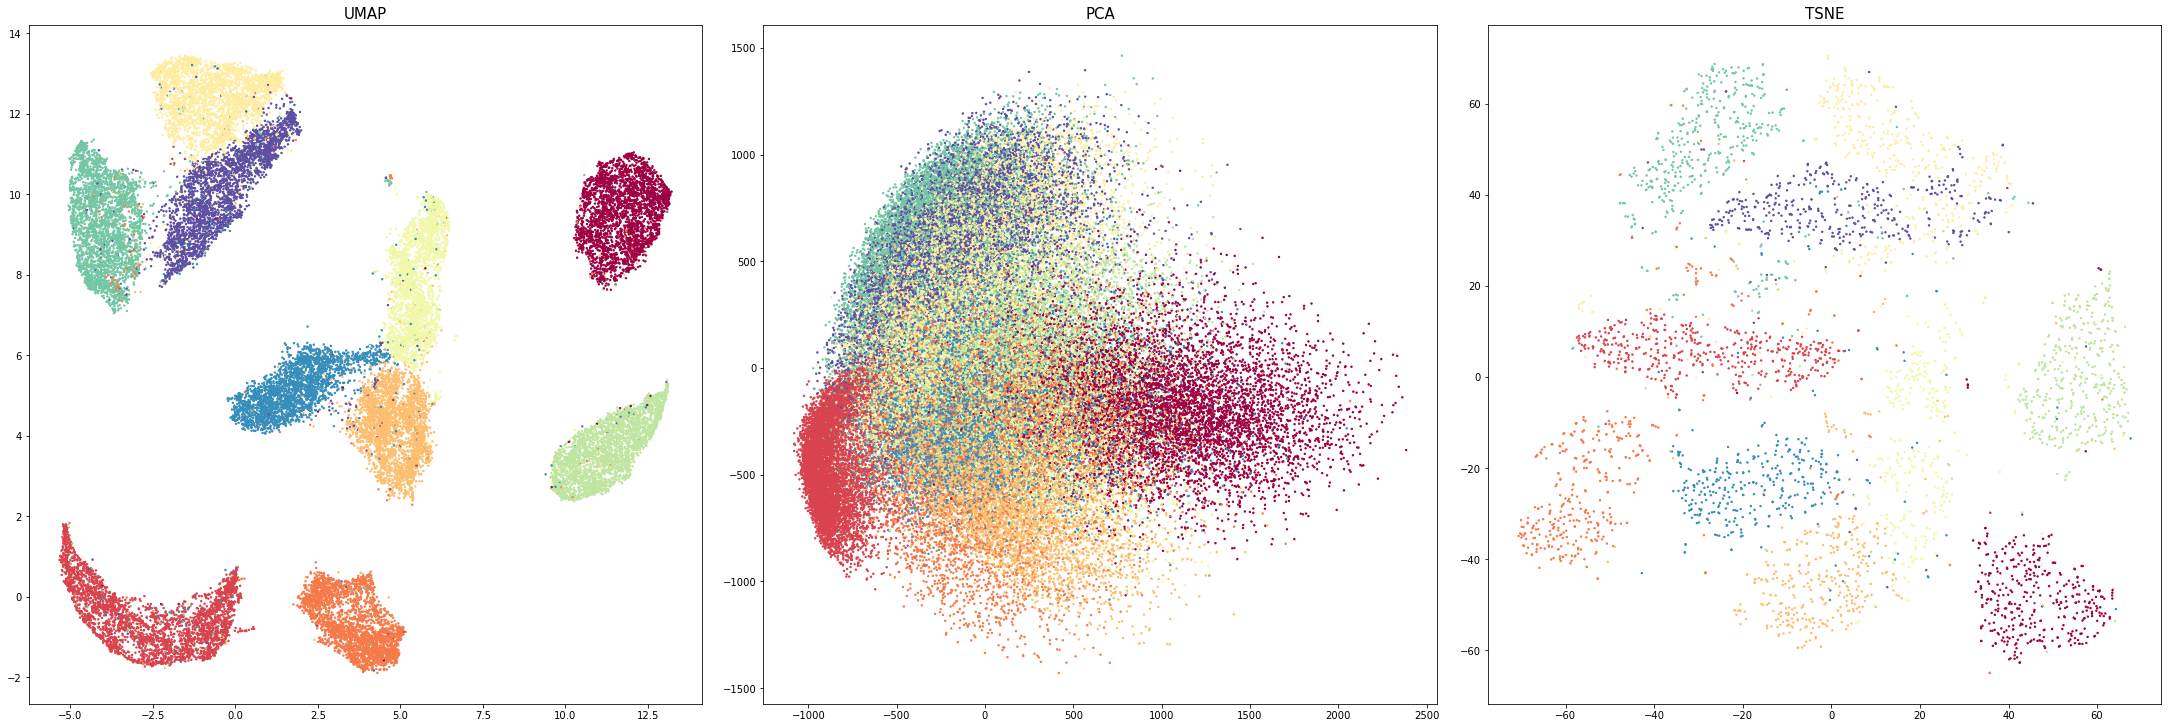

In [67]:
plt.rcParams["figure.figsize"] = (30,10)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, constrained_layout=True) 

print("UMAP на MNIST")
mnist_umap=mnist[:30000]
start = time.time()
mnist_emb = UMAP().fit_transform(mnist_umap)
print(f"Time: {time.time() - start} s")
ax1.scatter(mnist_emb[:,0], mnist_emb[:,1], c=mnist_umap['class'], cmap='Spectral', s=2)
ax1.set_title('UMAP',fontsize=15)

print("PCA на MNIST")
mnist_pca=mnist
start = time.time()
mnist_emb = PCA.fit_transform(mnist_pca)
print(f"Time: {time.time() - start} s")
ax2.scatter(mnist_emb[:,0], mnist_emb[:,1], c=mnist_pca['class'], cmap='Spectral', s=2)
ax2.set_title('PCA',fontsize=15)

print("Алгоритм TSNE на MNIST")
mnist_tsne=mnist[:4000]
start = time.time()
mnist_emb = TSNE.fit_transform(mnist_tsne)
print(f"Time: {time.time() - start} s")
ax3.scatter(mnist_emb[:,0], mnist_emb[:,1], c=mnist_tsne['class'], cmap='Spectral', s=2)
ax3.set_title('TSNE',fontsize=15)

plt.show()

In [68]:
coil_20_url = 'https://raw.githubusercontent.com/vaksakalli/datasets/master/coil20.csv'
coil_20 = pd.read_csv(coil_20_url)

In [75]:
coil_20['1025']

0        1
1        1
2        1
3        1
4        1
        ..
1435    20
1436    20
1437    20
1438    20
1439    20
Name: 1025, Length: 1440, dtype: int64

UMAP на COIL20
Time: 5.031548261642456 s
PCA на COIL20
Time: 0.05285143852233887 s
TSNE на COIL20
Time: 6.967440605163574 s


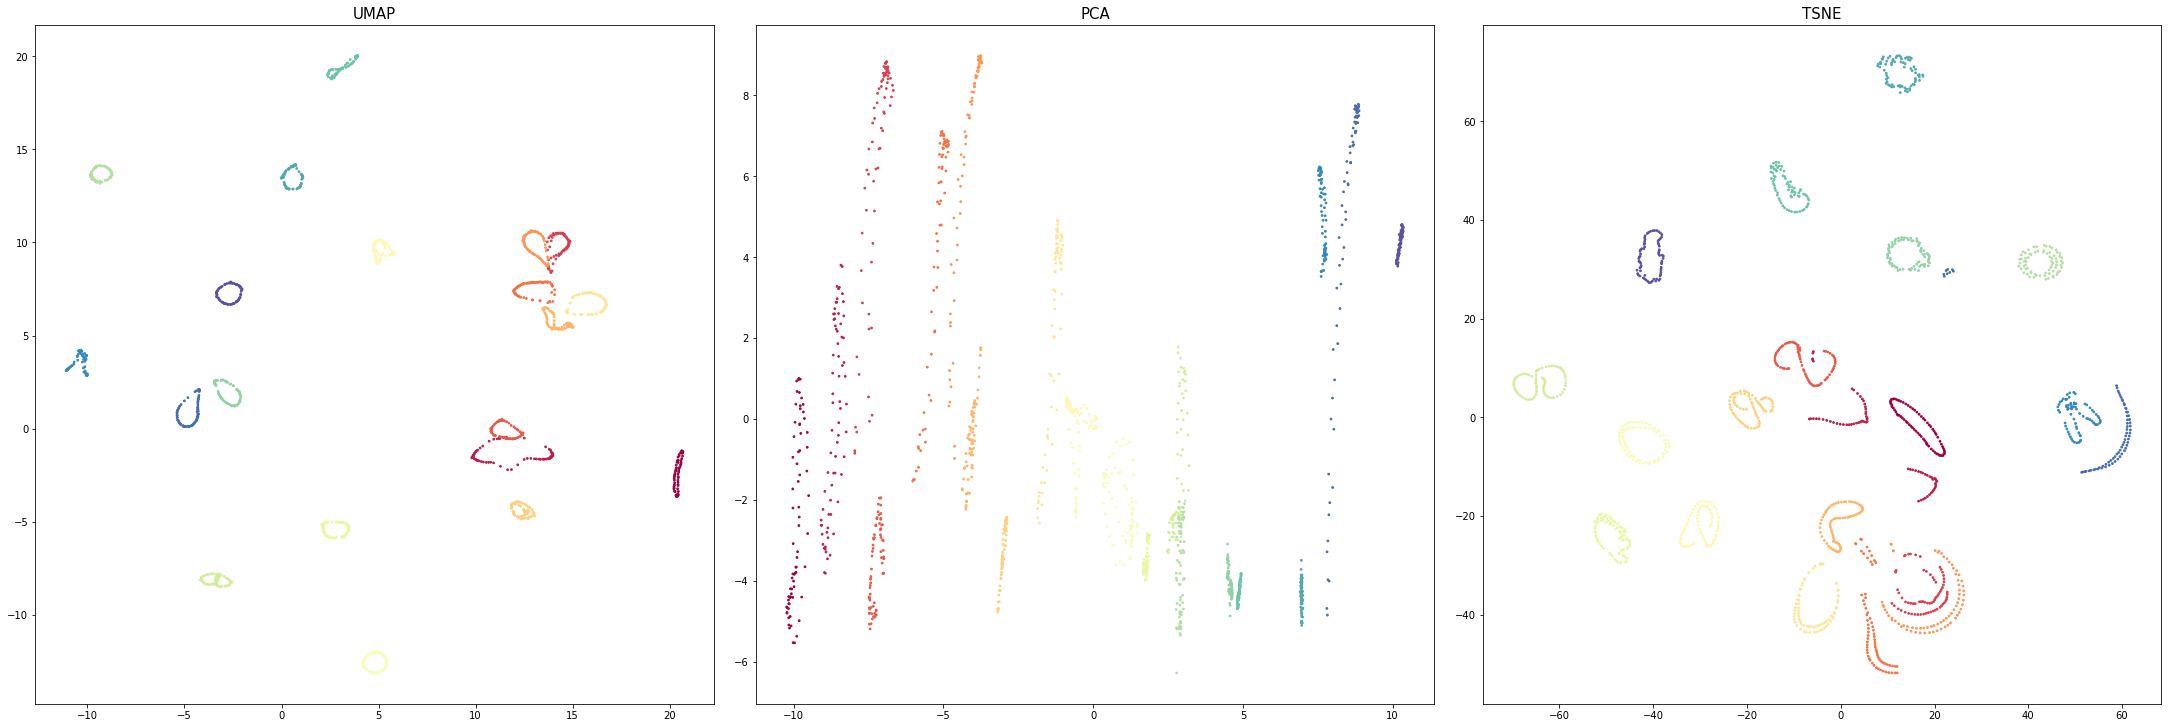

In [77]:
plt.rcParams["figure.figsize"] = (30,10)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, constrained_layout=True) 

print("UMAP на COIL20")
start = time.time()
coil_20_emb = UMAP().fit_transform(coil_20)
print(f"Time: {time.time() - start} s")
ax1.scatter(coil_20_emb[:,0], coil_20_emb[:,1], c=coil_20['1025'], cmap='Spectral', s=3)
ax1.set_title('UMAP',fontsize=15)

print("PCA на COIL20")
start = time.time()
coil_20_emb = PCA.fit_transform(coil_20)
print(f"Time: {time.time() - start} s")
ax2.scatter(coil_20_emb[:,0], coil_20_emb[:,1], c=coil_20['1025'], cmap='Spectral', s=3)
ax2.set_title('PCA',fontsize=15)

print("TSNE на COIL20")
start = time.time()
coil_20_emb = TSNE.fit_transform(coil_20)
print(f"Time: {time.time() - start} s")
ax3.scatter(coil_20_emb[:,0], coil_20_emb[:,1], c=coil_20['1025'], cmap='Spectral', s=3)
ax3.set_title('TSNE',fontsize=15)

plt.show()

In [78]:
__,__, f_mnist_x_test, f_mnist_y_test = dataget.image.fashion_mnist().get()
f_mnist = f_mnist_x_test.reshape(-1, 28*28)

UMAP на COIL20
Time: 8.611473560333252 s
PCA на COIL20
Time: 0.2238295078277588 s
TSNE на COIL20
Time: 87.01716804504395 s


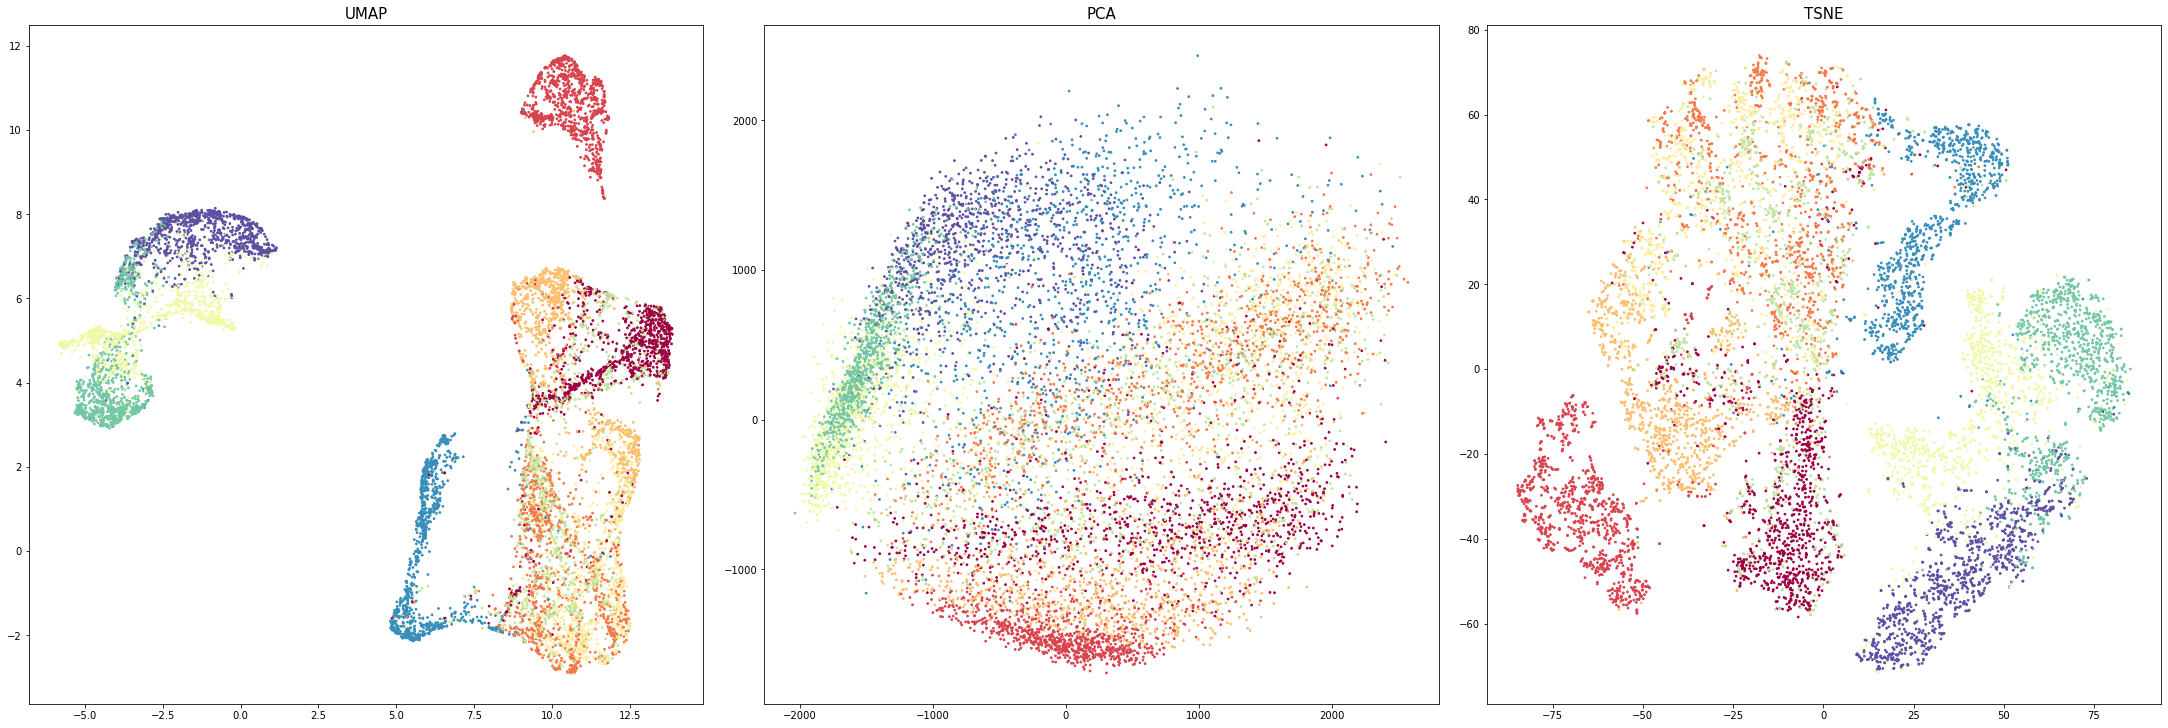

In [79]:
plt.rcParams["figure.figsize"] = (30,10)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, constrained_layout=True) 

print("UMAP на COIL20")
start = time.time()
f_mnist_emb = UMAP().fit_transform(f_mnist)
print(f"Time: {time.time() - start} s")
ax1.scatter(f_mnist_emb[:,0], f_mnist_emb[:,1], c=f_mnist_y_test, cmap='Spectral', s=3)
ax1.set_title('UMAP',fontsize=15)

print("PCA на COIL20")
start = time.time()
f_mnist_emb = PCA.fit_transform(f_mnist)
print(f"Time: {time.time() - start} s")
ax2.scatter(f_mnist_emb[:,0], f_mnist_emb[:,1], c=f_mnist_y_test, cmap='Spectral', s=3)
ax2.set_title('PCA',fontsize=15)

print("TSNE на COIL20")
start = time.time()
f_mnist_emb = TSNE.fit_transform(f_mnist)
print(f"Time: {time.time() - start} s")
ax3.scatter(f_mnist_emb[:,0], f_mnist_emb[:,1], c=f_mnist_y_test, cmap='Spectral', s=3)
ax3.set_title('TSNE',fontsize=15)

plt.show()

In [94]:
! pip install gensim
import seaborn as sns
from scipy import io
from gensim.models import Word2Vec
from gensim.downloader import load



In [95]:
word2vec = load('word2vec-google-news-300').vectors


[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [101]:
word2vec = word2vec[:40000]
print(word2vec.shape)
TSNE=TSNE(n_components=2)
PCA=PCA(n_components=2)

(40000, 300)


UMAP на Google news
Time: 15.936362028121948 s
PCA на Google news
Time: 0.23939132690429688 s
TSNE на Google news
Time: 469.015967130661 s


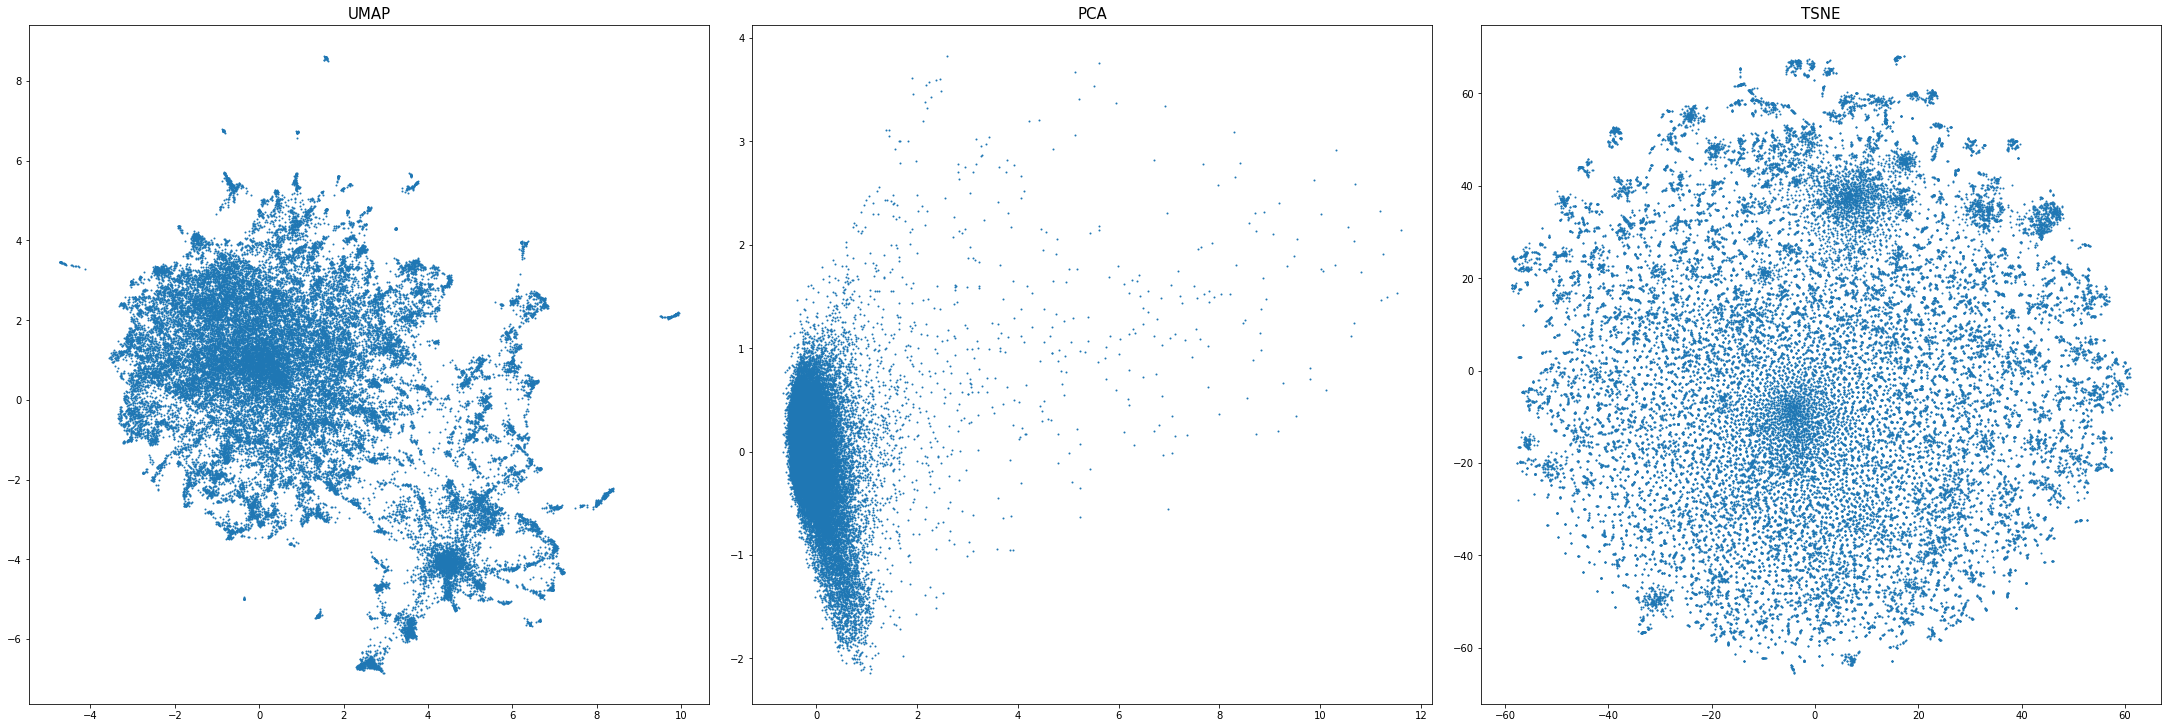

In [103]:
plt.rcParams["figure.figsize"] = (30,10)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, constrained_layout=True) 

print("UMAP на Google news")
start = time.time()
gnews_emb = UMAP().fit_transform(word2vec)
print(f"Time: {time.time() - start} s")
ax1.scatter(gnews_emb[:,0], gnews_emb[:,1], cmap='Spectral', s=1)
ax1.set_title('UMAP',fontsize=15)

print("PCA на Google news")
start = time.time()
gnews_emb = PCA.fit_transform(word2vec)
print(f"Time: {time.time() - start} s")
ax2.scatter(gnews_emb[:,0], gnews_emb[:,1], cmap='Spectral', s=1)
ax2.set_title('PCA',fontsize=15)

print("TSNE на Google news")
start = time.time()
gnews_emb = TSNE.fit_transform(word2vec)
print(f"Time: {time.time() - start} s")
ax3.scatter(gnews_emb[:,0], gnews_emb[:,1], cmap='Spectral', s=1)
ax3.set_title('TSNE',fontsize=15)

plt.show()